In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import math
import random
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [33]:
# Importing Dataset
df = pd.read_csv("kendaraan_test.csv")
df.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [34]:
# Replace String to numeric
df['Jenis_Kelamin'].replace('Wanita', 0, inplace=True)
df['Jenis_Kelamin'].replace('Pria', 1, inplace=True)
df['Umur_Kendaraan'].replace('< 1 Tahun', 0, inplace=True)
df['Umur_Kendaraan'].replace('1-2 Tahun', 1, inplace=True)
df['Umur_Kendaraan'].replace('> 2 Tahun', 2, inplace=True)
df['Kendaraan_Rusak'].replace('Pernah', 1, inplace=True)
df['Kendaraan_Rusak'].replace('Tidak', 0, inplace=True)
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,49,1,8,0,1,1,46963,26,145,0
1,1,22,1,47,1,0,0,39624,152,241,0
2,1,24,1,28,1,0,0,110479,152,62,0
3,1,46,1,8,1,1,0,36266,124,34,0
4,1,35,1,23,0,1,1,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,1,61,1,46,0,2,1,31039,124,67,0
47635,1,41,1,15,0,1,1,2630,157,232,0
47636,1,24,1,29,1,0,0,33101,152,211,0
47637,1,59,1,30,0,1,1,37788,26,239,1


In [35]:
# Drop unuse collumn
df.drop('Jenis_Kelamin',axis='columns', inplace=True)
df.drop('SIM',axis='columns', inplace=True)
df.drop('Sudah_Asuransi',axis='columns', inplace=True)
df.drop('Umur_Kendaraan',axis='columns', inplace=True)
df.drop('Kendaraan_Rusak',axis='columns', inplace=True)
df.drop('Tertarik',axis='columns', inplace=True)
# df.drop('id',axis='columns', inplace=True)
df

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,49,8,46963,26,145
1,22,47,39624,152,241
2,24,28,110479,152,62
3,46,8,36266,124,34
4,35,23,26963,152,229
...,...,...,...,...,...
47634,61,46,31039,124,67
47635,41,15,2630,157,232
47636,24,29,33101,152,211
47637,59,30,37788,26,239


C:\Users\Ajar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Premi'>

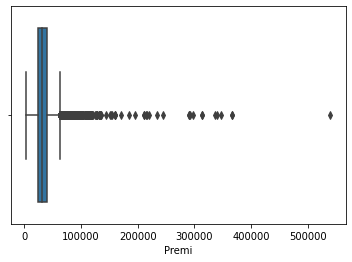

In [36]:
# Making boxplot to see outlier
sns.boxplot(df['Premi'])

In [37]:
# Function for handling outlier data
def handling_outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    LB=q1 - (IQR * 1.5)
    UB=q3 + (IQR *1.5)
    dff = df[((df>LB) & (df<UB))]
    return dff

In [38]:
# Calling handling_outlier function
df_new = df
df_new['Premi'] = handling_outlier(df['Premi'])
df_new

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,49,8,46963.0,26,145
1,22,47,39624.0,152,241
2,24,28,NaN,152,62
3,46,8,36266.0,124,34
4,35,23,26963.0,152,229
...,...,...,...,...,...
47634,61,46,31039.0,124,67
47635,41,15,2630.0,157,232
47636,24,29,33101.0,152,211
47637,59,30,37788.0,26,239


In [39]:
# Fill NULL value
gfg = pd.DataFrame(df_new)
meanValue = gfg['Premi'].mean()
df_new['Premi'].fillna(value=meanValue, inplace=True)
meanValue = gfg['Umur'].mean()
df_new['Umur'].fillna(value=meanValue, inplace=True)
meanValue = gfg['Kode_Daerah'].mean()
df_new['Kode_Daerah'].fillna(value=meanValue, inplace=True)
meanValue = gfg['Kanal_Penjualan'].mean()
df_new['Kanal_Penjualan'].fillna(value=meanValue, inplace=True)
meanValue = gfg['Lama_Berlangganan'].mean()
df_new['Lama_Berlangganan'].fillna(value=meanValue, inplace=True)

print(df_new)
print(df_new.isna().sum())

       Umur  Kode_Daerah         Premi  Kanal_Penjualan  Lama_Berlangganan
0        49            8  46963.000000               26                145
1        22           47  39624.000000              152                241
2        24           28  29319.082061              152                 62
3        46            8  36266.000000              124                 34
4        35           23  26963.000000              152                229
...     ...          ...           ...              ...                ...
47634    61           46  31039.000000              124                 67
47635    41           15   2630.000000              157                232
47636    24           29  33101.000000              152                211
47637    59           30  37788.000000               26                239
47638    52           31   2630.000000              124                170

[47639 rows x 5 columns]
Umur                 0
Kode_Daerah          0
Premi                0
Kanal

<AxesSubplot:>

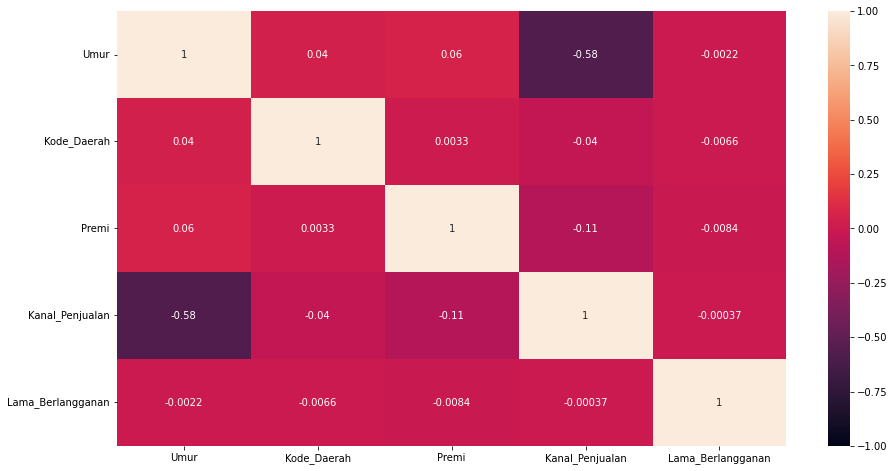

In [40]:
#Visualisasi Korelasinya, Makin terang warnanya, semakin mempunyai korelasi
plt.figure(figsize=(15,8))
sns.heatmap(df_new.corr(), annot=True, vmin=-1, vmax=1)

C:\Users\Ajar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Premi'>

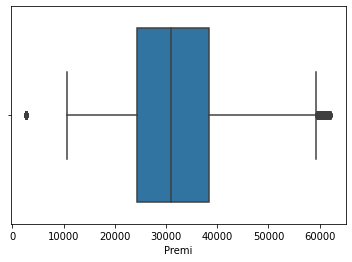

In [41]:
# new boxplot without outlier
sns.boxplot(df_new['Premi'])

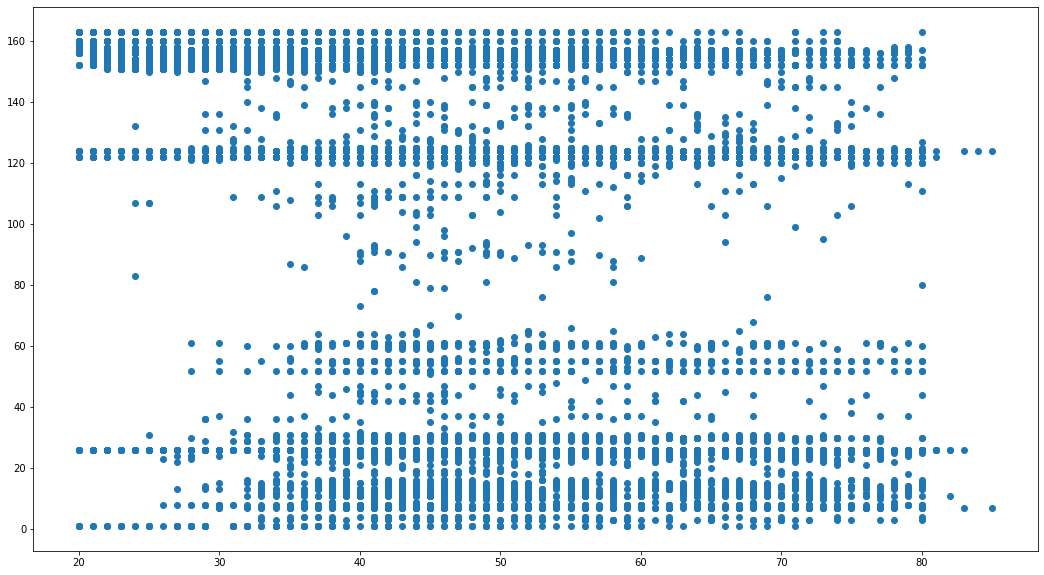

In [42]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df_new['Umur'], df_new['Kanal_Penjualan'])
 
# x-axis label
# ax.set_xlabel('(Proportion non-retail business acres)/(town)')
 
# y-axis label
# ax.set_ylabel('(Full-value property-tax rate)/( $10,000)')
plt.show()

In [43]:
# Min Max Scaller Normalization
Scaller = MinMaxScaler()
Scaller.fit(df_new)
df_new = Scaller.transform(df_new)
df_Scale = pd.DataFrame(df_new, columns=['Umur','Kode_Daerah', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan'])
df_Scale

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.446154,0.153846,0.745581,0.154321,0.467128
1,0.030769,0.903846,0.622156,0.932099,0.799308
2,0.061538,0.538462,0.448850,0.932099,0.179931
3,0.400000,0.153846,0.565682,0.759259,0.083045
4,0.230769,0.442308,0.409226,0.932099,0.757785
...,...,...,...,...,...
47634,0.630769,0.884615,0.477775,0.759259,0.197232
47635,0.323077,0.288462,0.000000,0.962963,0.768166
47636,0.061538,0.557692,0.512454,0.932099,0.695502
47637,0.600000,0.576923,0.591278,0.154321,0.792388


In [44]:
pca = PCA(n_components=2) #Memakai Principle Component Analysis untuk merubah data menjadi 2 dimensi
principal = pca.fit_transform(df_Scale)
df_pca = pd.DataFrame(data=principal, columns=['pca1','pca2'])
df_pca

,pca1,pca2
0,0.551400,-0.026860
1,-0.296367,0.283790
2,-0.320930,-0.322478
3,-0.012849,-0.410986
4,-0.249439,0.258469
...,...,...
47634,0.130048,-0.312312
47635,-0.288827,0.281609
47636,-0.313478,0.190913
47637,0.630875,0.291607


In [45]:
df_final = df_pca.to_numpy()
# df_final = df_Scale[['Umur', 'Kanal_Penjualan']].to_numpy()

In [46]:
def importData(x):
    arr = []
    for i in range(len(x)):
        arr.append([x[i][0], x[i][1]])
    return arr

In [47]:
Data = importData(df_final)
df_Data = pd.DataFrame(Data, columns=['PCA 1', 'PCA 2'])
df_Data
# print(Data)
# 0.7455811372159903 0.15432098765432098 0

,PCA 1,PCA 2
0,0.551400,-0.026860
1,-0.296367,0.283790
2,-0.320930,-0.322478
3,-0.012849,-0.410986
4,-0.249439,0.258469
...,...,...
47634,0.130048,-0.312312
47635,-0.288827,0.281609
47636,-0.313478,0.190913
47637,0.630875,0.291607


In [48]:
def randCen(arr, x):
    arrCen = []
    for i in range(x):
        rand = random.randint(0, len(arr))
        arrCen.append(arr[rand])
    return arrCen

In [49]:
def euclidean(arrtest, testing):
    i = 0
    x = 0
    while (i < len(arrtest)):
        x = x + ((arrtest[i] - testing[i]) * (arrtest[i] - testing[i]))
        i = i + 1
    return math.sqrt(x)

In [50]:
# [[0.7455811372159903, 0.15432098765432098], [0.6221556986932611, 0.9320987654320987]]
def calculateEclu(arr, x):
    newArr = []
    for i in range(len(arr)):
        newArr.append([])
        for j in range(len(x)):
            newArr[i].append(euclidean(arr[i], x[j]))
    return newArr

In [51]:
def mean(x):
#     print(len(x))
    return sum(x)/len(x)

In [52]:
def defineCluster2(data, cen):
    hasilEclu = calculateEclu(data, cen)
    cluster = []
    for i in range(len(hasilEclu)):
        m = min(hasilEclu[i])
        idx = hasilEclu[i].index(m)
        cluster.append([data[i][0], data[i][1], idx])
    return cluster, hasilEclu
    

In [53]:
def meanCen(x, k):
    newCen = []
    data1 = []
    data2 = []
    for i in range(k):
        for j in range(len(x)):
            if x[j][2] == i:
                data1.append(x[j][0])
                data2.append(x[j][1])
#         print(len(data1))
#         print(len(data2))
        newCen.append([mean(data1), mean(data2)])
        data1 = []
        data2 = []
    return newCen

In [54]:
def visual2D(x, cen, k):
    plt.subplots(figsize=(10,10))
    for i in range(k):
        xarr = []
        yarr = []
        for j in range(len(x)):
            # print(x[j][k])
            if x[j][2] == i:
                xarr.append(x[j][0])
                yarr.append(x[j][1])
        plt.scatter(xarr, yarr)
    cenx = []
    ceny = []
    # output Centroid [[Cen_x_1, Cen_y_1], [Cen_x_2, Cen_y_2]]
    for i in range(k):
        cenx.append(cen[i][0])
        ceny.append(cen[i][1])
    plt.scatter(cenx, ceny, s=299, color='black')

In [55]:
k = 4
cen = randCen(Data, k)
print(cen)
# cluster, distance = defineCluster2(Data, cen)
# df_cluster = pd.DataFrame(cluster, columns=['PCA 1', 'PCA 2', 'CLUSTER'])
# df_cluster
# cluster = defineCluster2(Data, 
# visual2D(cluster, cen, k)
# newCen = meanCen(cluster, k)
# display = pd.DataFrame(cluster, columns=['PCA 1','PCA 2', 'Cluster'])
# display
# visual2D(cluster, cen, k)
# newCen = meanCen(cluster, k)

[[-0.12450003942156423, -0.25688146405809975], [-0.06466158788564985, -0.31916045284909156], [-0.30931985637974213, 0.19863326269787718], [-0.3581222026068929, 0.20634897868897195]]


In [56]:
def Kmeans(k , cen):
    while True:
        x = 0
        y = 0
        xmean = 0
        ymean = 0
        # print(arrCen)
        # print(cenMean)
        # print("=====================================================")
        cluster, distance = defineCluster2(Data, cen)
        # visual2D(cluster, cen, k)
        newCen = meanCen(cluster, k)
        for i in range(k):
            x = x + mean(cen[i])
            y = y + mean(newCen[i])
        xmean = x / k
        ymean = y / k
        # print(xmean, "==", ymean)
        if xmean == ymean :
            print("END")
            break
        cen = newCen
    # coba aja dulu yang dibawah ini
    df_cluster = pd.DataFrame(distance)
    return cluster, cen, df_cluster
    # print(cluster)

END


,0,1,2,3
0,0.805199,0.017505,0.564656,0.904711
1,0.561379,0.910370,0.347128,0.049780
2,0.116859,0.936776,0.658126,0.559728
3,0.245998,0.699791,0.637807,0.714699
4,0.531300,0.857779,0.297027,0.067891


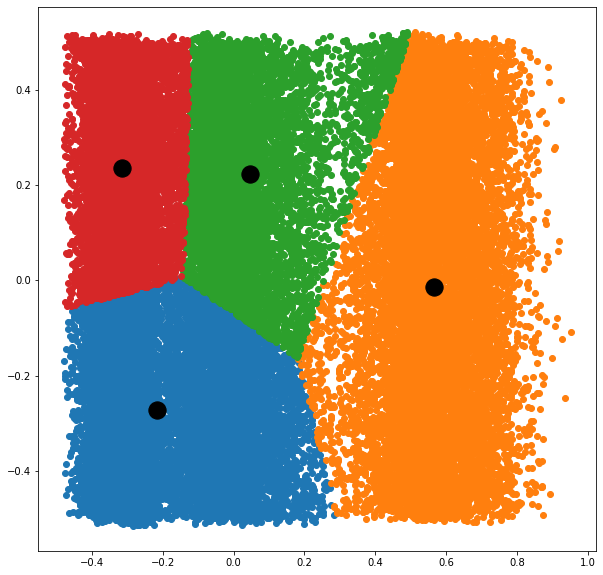

In [57]:
cluster, cen, df_cluster = Kmeans(k, cen)
visual2D(cluster, cen, k)
df_cluster.head()


# **EVALUASI**

In [29]:
X = df_Data.values

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [30]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 0.44085360665082146
2 : 0.29923206005254593
3 : 0.2248411048127261
4 : 0.19324284050743368
5 : 0.1710383018724885
6 : 0.15203402854049822
7 : 0.1331580799906916
8 : 0.12407335201502988
9 : 0.11602446778996924


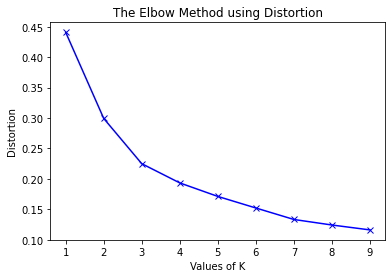

In [31]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()